### Descriptive and Exploratory Data Analysis of 1970s Dataset

In [140]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy.stats as scp
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
# Import dataset
df_70s = pd.read_csv('../1970.csv')

In [142]:
total_rows, total_attributes = df_70s.shape

print('Total Rows:', total_rows)
print('Total Columns:', total_attributes)

Total Rows: 104
Total Columns: 15


The 70s song dataset contains 15 attributes with 104 data rows.

In [143]:
df_70s.head(5)

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
0,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,71,40,41,-10,30,22,354,27,5,84,1.0
1,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13,83,0.0
2,Don't Stop Me Now - 2011 Mix,Queen,glam rock,1978,156,87,56,-5,78,61,209,5,17,82,1.0
3,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,glam rock,1972,137,53,60,-9,9,34,282,43,3,81,1.0
4,We Will Rock You - Remastered,Queen,glam rock,1977,81,50,69,-7,26,48,122,68,12,79,0.0


In [144]:
# Column overview
df_70s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          104 non-null    object 
 1   artist         104 non-null    object 
 2   genre          104 non-null    object 
 3   year           104 non-null    int64  
 4   bpm            104 non-null    int64  
 5   nrgy           104 non-null    int64  
 6   dnce           104 non-null    int64  
 7   dB             104 non-null    int64  
 8   live           104 non-null    int64  
 9   val            104 non-null    int64  
 10  dur            104 non-null    int64  
 11  acous          104 non-null    int64  
 12  spch           104 non-null    int64  
 13  popularity     104 non-null    int64  
 14  has_win_award  104 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 12.3+ KB


From the statistics, it is known that the data does not contain null values. (The non-null count equals the number of rows in the data).

### Statistics

Genre Count

In [145]:
genre_arr = df_70s['genre']
genre_count = genre_arr.value_counts()
display(genre_count)

album rock             31
adult standards        19
glam rock              16
europop                 7
disco                   6
soft rock               4
classic uk pop          3
classic soul            3
chicago soul            2
dance pop               2
country rock            2
brit funk               1
country                 1
classic country pop     1
dance rock              1
pop                     1
hollywood               1
british folk            1
british invasion        1
native american         1
Name: genre, dtype: int64

From the value count, it is known that the majority of the most popular songs from the 70s has an album rock genre, followed by adult standards, and glam rock. 

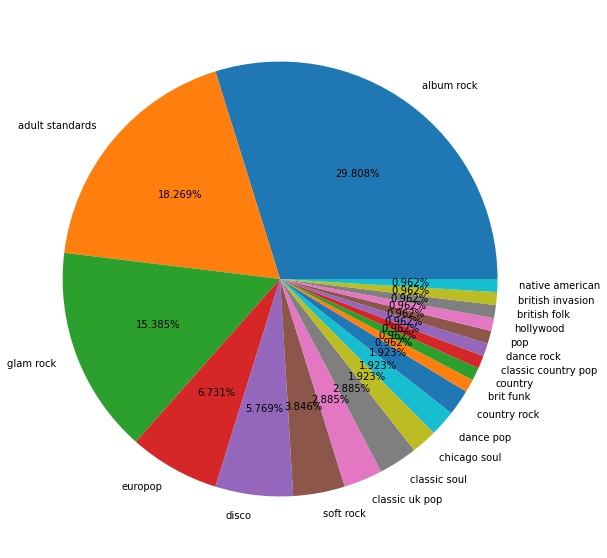

In [146]:
# Data visualization
plt.figure(figsize=(10,10))
plt.pie(genre_arr.value_counts(), labels=genre_count.index.tolist(), autopct='%1.3f%%')
plt.show()

### BPM

In [147]:
bpm_arr = df_70s['bpm']

In [148]:
# Compute additional information
Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

bpm_stats = [
    ['Mean', np.mean(bpm_arr)],
    ['Median', np.median(bpm_arr)],
    ['Mode', scp.mode(bpm_arr)[0][0]],
    ['Standard Deviation', np.std(bpm_arr)],
    ['Variance', np.var(bpm_arr)],
    ['Minimum', np.min(bpm_arr)],
    ['Maximum', np.max(bpm_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('BPM Description')
display(pd.DataFrame(bpm_stats, columns=['Measure', 'Value']))

BPM Description


,Measure,Value
0,Mean,120.875000
1,Median,120.500000
2,Mode,107.000000
3,Standard Deviation,23.205473
4,Variance,538.493990
5,Minimum,64.000000
6,Maximum,199.000000
7,Q1,106.000000
8,Q3,135.500000
9,IQR,29.500000


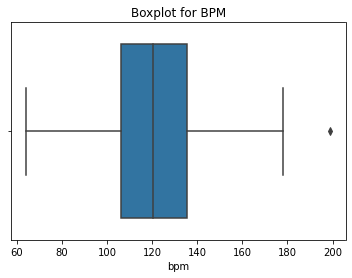

Outlier exists?  True


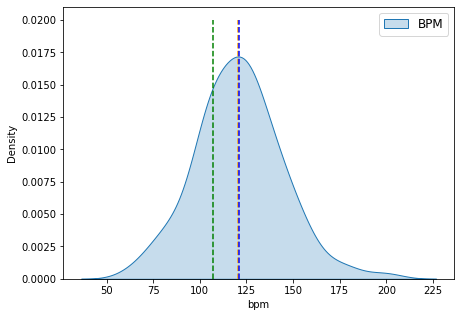

In [149]:
plt.title("Boxplot for BPM")
sns.boxplot(x='bpm', data=df_70s)
plt.show()

Q1 = np.percentile(bpm_arr, 25, interpolation='midpoint')
Q3 = np.percentile(bpm_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(bpm_arr) > RUB  or (np.min(bpm_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=bpm_arr, shade=True)
plt.legend(['BPM'], fontsize=12)
plt.vlines(x=bpm_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=bpm_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(bpm_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [150]:
# Skewness
bpm_arr.skew()

0.3263880585797223

From the distribution visualization and skewness calculation, it is shown that the data is positively skewed. This is associated with the mode < median < mean. The mean is shifted to the right of the median due to the existence of outliers that exceeds the RUB. However, as the skewness is relatively low, the distribution is fairly symmetrical.

As outlier exists and the data is numerical (not categorical), the median best describes the bpm column. However, the exact value of the mean and median is roughly equal. It is shown that the average and median bpm of the most popular songs in the 70s is 120. 

#### NRGY

In [151]:
nrgy_arr = df_70s['nrgy']

In [152]:
# Compute additional information
Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

nrgy_stats = [
    ['Mean', np.mean(nrgy_arr)],
    ['Median', np.median(nrgy_arr)],
    ['Mode', scp.mode(nrgy_arr)[0][0]],
    ['Standard Deviation', np.std(nrgy_arr)],
    ['Variance', np.var(nrgy_arr)],
    ['Minimum', np.min(nrgy_arr)],
    ['Maximum', np.max(nrgy_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('NRGY Description')
display(pd.DataFrame(nrgy_stats, columns=['Measure', 'Value']))

NRGY Description


,Measure,Value
0,Mean,62.961538
1,Median,67.500000
2,Mode,91.000000
3,Standard Deviation,21.538393
4,Variance,463.902367
5,Minimum,13.000000
6,Maximum,97.000000
7,Q1,44.500000
8,Q3,79.500000
9,IQR,35.000000


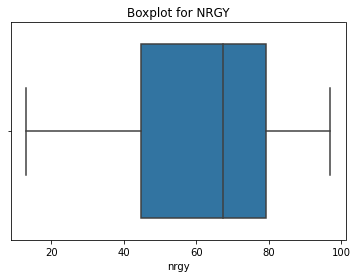

Outlier exists?  False


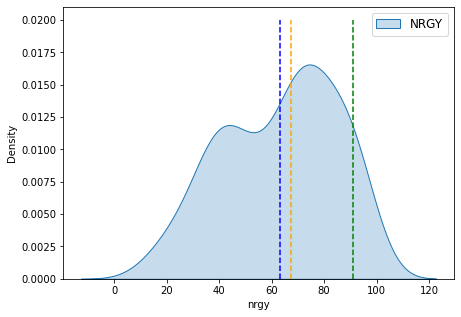

In [153]:
plt.title("Boxplot for NRGY")
sns.boxplot(x='nrgy', data=df_70s)
plt.show()

Q1 = np.percentile(nrgy_arr, 25, interpolation='midpoint')
Q3 = np.percentile(nrgy_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(nrgy_arr) > RUB or (np.min(nrgy_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=nrgy_arr, shade=True)
plt.legend(['NRGY'], fontsize=12)
plt.vlines(x=nrgy_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=nrgy_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(nrgy_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [154]:
# Skewness
nrgy_arr.skew()

-0.3218849673130179

From the skewness calculation, it is known that the distribution is negatively skewed. This is associated with the fact that mean < median < mode. The mean is shifted to the left of the median as there exists data points that is much less than the mean, although is still within the bound of the RLB. 

With its low skewness value, the distribution is fairly symmetrical.

#### DNCE

In [155]:
dnce_arr = df_70s['dnce']

In [156]:
# Compute additional information
Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dnce_stats = [
    ['Mean', np.mean(dnce_arr)],
    ['Median', np.median(dnce_arr)],
    ['Mode', scp.mode(dnce_arr)[0][0]],
    ['Standard Deviation', np.std(dnce_arr)],
    ['Variance', np.var(dnce_arr)],
    ['Minimum', np.min(dnce_arr)],
    ['Maximum', np.max(dnce_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DNCE Description')
display(pd.DataFrame(dnce_stats, columns=['Measure', 'Value']))

DNCE Description


,Measure,Value
0,Mean,56.596154
1,Median,57.000000
2,Mode,52.000000
3,Standard Deviation,14.600790
4,Variance,213.183062
5,Minimum,26.000000
6,Maximum,83.000000
7,Q1,45.000000
8,Q3,68.500000
9,IQR,23.500000


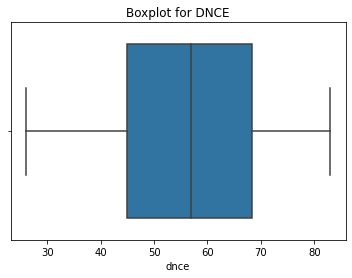

Outlier exists?  False


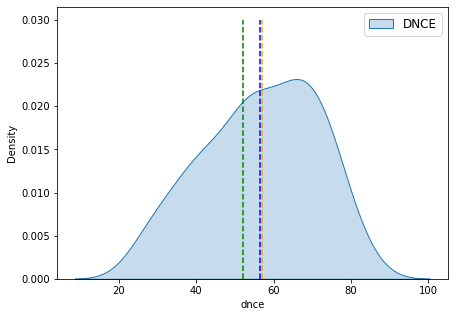

In [157]:
plt.title("Boxplot for DNCE")
sns.boxplot(x='dnce', data=df_70s)
plt.show()

Q1 = np.percentile(dnce_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dnce_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dnce_arr) > RUB  or (np.min(dnce_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dnce_arr, shade=True)
plt.legend(['DNCE'], fontsize=12)
plt.vlines(x=dnce_arr.median(), ymin=0, ymax=0.03, color='orange', linestyle='--')
plt.vlines(x=dnce_arr.mean(), ymin=0, ymax=0.03, color='blue', linestyle='--')
plt.vlines(x=scp.mode(dnce_arr)[0][0], ymin=0, ymax=0.03, color='green', linestyle='--')
plt.show()

We can measure the skewness as follows. 

In [158]:
dnce_arr.skew()

-0.29341127953211477

From the KDE plot and the skewness, it can be seen that the distribution is slightly negatively skewed, which is associated with the fact that the mean < median. 

However, as the skewness value is relatively small, the distribution is fairly symmetrical.

#### dB

In [159]:
db_arr = df_70s['dB']

In [160]:
# Compute additional information
Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

db_stats = [
    ['Mean', np.mean(db_arr)],
    ['Median', np.median(db_arr)],
    ['Mode', scp.mode(db_arr)[0][0]],
    ['Standard Deviation', np.std(db_arr)],
    ['Variance', np.var(db_arr)],
    ['Minimum', np.min(db_arr)],
    ['Maximum', np.max(db_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DB Description')
display(pd.DataFrame(db_stats, columns=['Measure', 'Value']))

DB Description


,Measure,Value
0,Mean,-9.000000
1,Median,-9.000000
2,Mode,-10.000000
3,Standard Deviation,3.107064
4,Variance,9.653846
5,Minimum,-17.000000
6,Maximum,-4.000000
7,Q1,-11.000000
8,Q3,-7.000000
9,IQR,4.000000


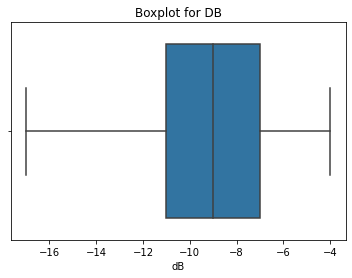

Outlier exists?  False


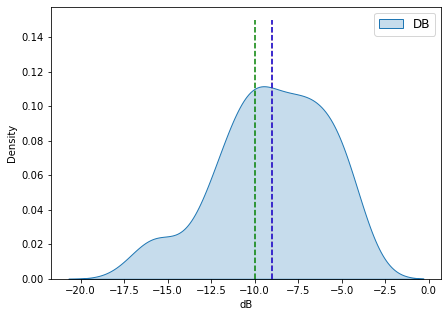

In [161]:
plt.title("Boxplot for DB")
sns.boxplot(x='dB', data=df_70s)
plt.show()

Q1 = np.percentile(db_arr, 25, interpolation='midpoint')
Q3 = np.percentile(db_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(db_arr) > RUB or (np.min(db_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=db_arr, shade=True)
plt.legend(['DB'], fontsize=12)
plt.vlines(x=db_arr.median(), ymin=0, ymax=0.15, color='orange', linestyle='--')
plt.vlines(x=db_arr.mean(), ymin=0, ymax=0.15, color='blue', linestyle='--')
plt.vlines(x=scp.mode(db_arr)[0][0], ymin=0, ymax=0.15, color='green', linestyle='--')
plt.show()

In [162]:
# Skewness
db_arr.skew()

-0.49376804704872485

From the KDE plot and the skewness, the distribution is negatively skewed. However, despite the skewness, the mean is still equal to the median.
This negatively skewed distribution also implies that the data is more concentrated on the right of the dB number line (axis).

#### LIVE

In [163]:
live_arr = df_70s['live']

In [164]:
# Compute additional information
Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

live_stats = [
    ['Mean', np.mean(live_arr)],
    ['Median', np.median(live_arr)],
    ['Mode', scp.mode(live_arr)[0][0]],
    ['Standard Deviation', np.std(live_arr)],
    ['Variance', np.var(live_arr)],
    ['Minimum', np.min(live_arr)],
    ['Maximum', np.max(live_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('LIVE Description')
display(pd.DataFrame(live_stats, columns=['Measure', 'Value']))

LIVE Description


,Measure,Value
0,Mean,19.634615
1,Median,14.000000
2,Mode,12.000000
3,Standard Deviation,13.238244
4,Variance,175.251109
5,Minimum,4.000000
6,Maximum,78.000000
7,Q1,11.000000
8,Q3,25.500000
9,IQR,14.500000


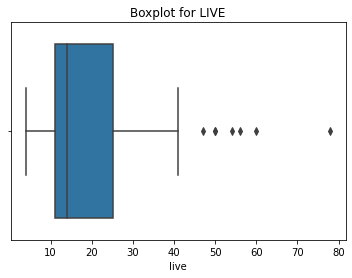

Outlier exists?  True


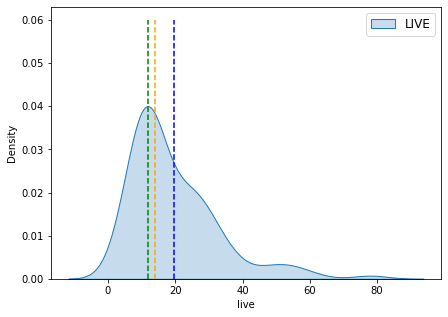

In [165]:
plt.title("Boxplot for LIVE")
sns.boxplot(x='live', data=df_70s)
plt.show()

Q1 = np.percentile(live_arr, 25, interpolation='midpoint')
Q3 = np.percentile(live_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(live_arr) > RUB or (np.min(live_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=live_arr, shade=True)
plt.legend(['LIVE'], fontsize=12)
plt.vlines(x=live_arr.median(), ymin=0, ymax=0.06, color='orange', linestyle='--')
plt.vlines(x=live_arr.mean(), ymin=0, ymax=0.06, color='blue', linestyle='--')
plt.vlines(x=scp.mode(live_arr)[0][0], ymin=0, ymax=0.06, color='green', linestyle='--')
plt.show()

In [166]:
# Skewness
live_arr.skew()

1.7515779539937208

As shown, the distribution is positively skewed where the mode < median < mean. The skewness exists because there are outliers (exceeding RUB) in the data and thus the mean is shifted to the right of the median. The positive skewness implies that the data is more concentrated on the left though there exists outliers on the right. Based on the data context, this happens as there are several songs that is very likely to be recorded live although, from the distribution, it can be seen that more songs are not a live recording.

#### VAL

In [167]:
val_arr = df_70s['val']

In [168]:
# Compute additional information
Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

val_stats = [
    ['Mean', np.mean(val_arr)],
    ['Median', np.median(val_arr)],
    ['Mode', scp.mode(val_arr)[0][0]],
    ['Standard Deviation', np.std(val_arr)],
    ['Variance', np.var(val_arr)],
    ['Minimum', np.min(val_arr)],
    ['Maximum', np.max(val_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('VAL Description')
display(pd.DataFrame(val_stats, columns=['Measure', 'Value']))

VAL Description


,Measure,Value
0,Mean,62.942308
1,Median,67.500000
2,Mode,96.000000
3,Standard Deviation,24.634180
4,Variance,606.842825
5,Minimum,7.000000
6,Maximum,98.000000
7,Q1,44.500000
8,Q3,83.000000
9,IQR,38.500000


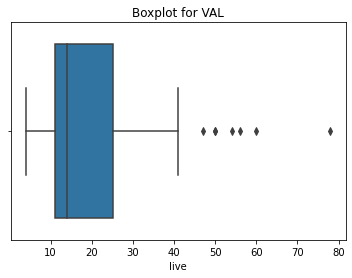

Outlier exists?  False


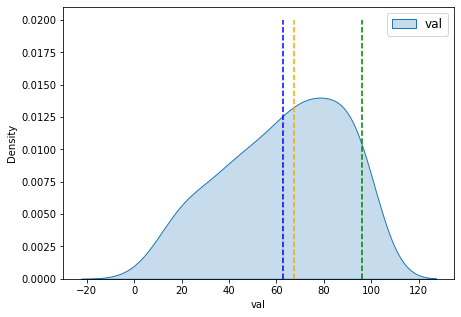

In [169]:
plt.title("Boxplot for VAL")
sns.boxplot(x='live', data=df_70s)
plt.show()

Q1 = np.percentile(val_arr, 25, interpolation='midpoint')
Q3 = np.percentile(val_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(val_arr) > RUB or (np.min(val_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=val_arr, shade=True)
plt.legend(['val'], fontsize=12)
plt.vlines(x=val_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=val_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(val_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [170]:
val_arr.skew()

-0.4043799381463815

The distribution is negatively skewed and this fact is associated with the mean < median < mode. This skewness, indicated with a longer tail on the left, implies that the data is more concentrated on the right. The shift of the mean to the left of the median also implies the existence of values that are much lower than the mean.

#### DUR

In [171]:
dur_arr = df_70s['dur']

In [172]:
# Compute additional information
Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

dur_stats = [
    ['Mean', np.mean(dur_arr)],
    ['Median', np.median(dur_arr)],
    ['Mode', scp.mode(dur_arr)[0][0]],
    ['Standard Deviation', np.std(dur_arr)],
    ['Variance', np.var(dur_arr)],
    ['Minimum', np.min(dur_arr)],
    ['Maximum', np.max(dur_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('DUR Description')
display(pd.DataFrame(dur_stats, columns=['Measure', 'Value']))

DUR Description


,Measure,Value
0,Mean,232.269231
1,Median,221.000000
2,Mode,213.000000
3,Standard Deviation,56.937251
4,Variance,3241.850592
5,Minimum,116.000000
6,Maximum,511.000000
7,Q1,197.500000
8,Q3,267.000000
9,IQR,69.500000


Note: The variance is relatively large. This implies that the duration of the most popular songs in 1970s greatly vary from one another.

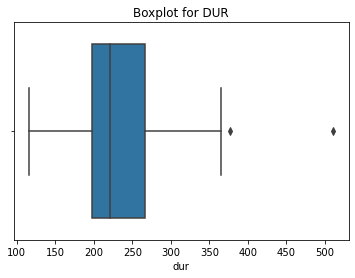

Outlier exists?  True


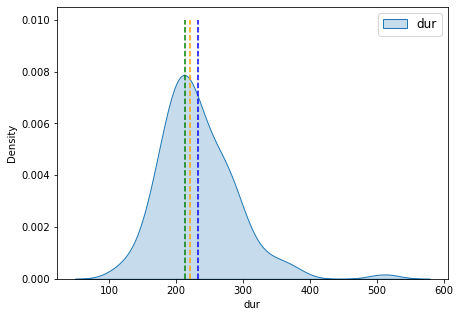

In [194]:
plt.title("Boxplot for DUR")
sns.boxplot(x='dur', data=df_70s)
plt.show()

Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(dur_arr) > RUB or (np.min(dur_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=dur_arr, shade=True)
plt.legend(['dur'], fontsize=12)
plt.vlines(x=dur_arr.median(), ymin=0, ymax=0.01, color='orange', linestyle='--')
plt.vlines(x=dur_arr.mean(), ymin=0, ymax=0.01, color='blue', linestyle='--')
plt.vlines(x=scp.mode(dur_arr)[0][0], ymin=0, ymax=0.01, color='green', linestyle='--')
plt.show()

In [195]:
# Skewness
dur_arr.skew()

1.402037478781466

As shown from the KDE plot and the skewness calculation, the distribution is positively skewed. This is associated with the fact that the mean > median > mode. The mean is shifted to the right from the median due to the existence of outliers that exceeds the RUB. 

#### ACOUS

In [174]:
acous_arr = df_70s['acous']

In [175]:
# Compute additional information
Q1 = np.percentile(acous_arr, 25, interpolation='midpoint')
Q3 = np.percentile(acous_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

acous_stats = [
    ['Mean', np.mean(acous_arr)],
    ['Median', np.median(acous_arr)],
    ['Mode', scp.mode(acous_arr)[0][0]],
    ['Standard Deviation', np.std(acous_arr)],
    ['Variance', np.var(acous_arr)],
    ['Minimum', np.min(acous_arr)],
    ['Maximum', np.max(acous_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('ACOUS Description')
display(pd.DataFrame(acous_stats, columns=['Measure', 'Value']))

ACOUS Description


,Measure,Value
0,Mean,31.048077
1,Median,23.500000
2,Mode,6.000000
3,Standard Deviation,27.002272
4,Variance,729.122689
5,Minimum,0.000000
6,Maximum,94.000000
7,Q1,9.000000
8,Q3,42.500000
9,IQR,33.500000


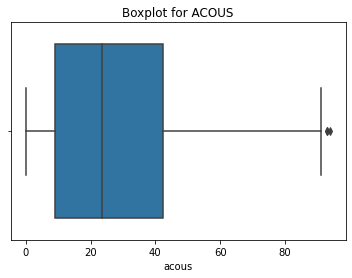

Outlier exists?  True


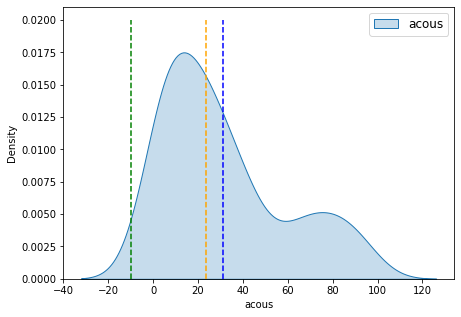

In [197]:
plt.title("Boxplot for ACOUS")
sns.boxplot(x='acous', data=df_70s)
plt.show()

Q1 = np.percentile(dur_arr, 25, interpolation='midpoint')
Q3 = np.percentile(dur_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(acous_arr) > RUB or (np.min(acous_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=acous_arr, shade=True)
plt.legend(['acous'], fontsize=12)
plt.vlines(x=acous_arr.median(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.vlines(x=acous_arr.mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=scp.mode(db_arr)[0][0], ymin=0, ymax=0.02, color='green', linestyle='--')
plt.show()

In [198]:
# Skewness
acous_arr.skew()

0.9270589565678543

From the distribution and the skewness calculation, the distribution is positively skewed. This is associated with the fact that the mode < median < mean. The shift in mean to the right of the median is due to the existence of outliers that exceeds the RUB. Positively skewed distribution also implies that data are more concentrated on the left. In this case, it can be seen that the a majority of the song tends to have a lower acous value such that they are more likely to be non acoustic (This is in accordance to the fact that a majority of them belongs to a rock genre).

#### SPCH

In [177]:
spch_arr = df_70s['spch']

In [178]:
# Compute additional information
Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

spch_stats = [
    ['Mean', np.mean(spch_arr)],
    ['Median', np.median(spch_arr)],
    ['Mode', scp.mode(spch_arr)[0][0]],
    ['Standard Deviation', np.std(spch_arr)],
    ['Variance', np.var(spch_arr)],
    ['Minimum', np.min(spch_arr)],
    ['Maximum', np.max(spch_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('SPCH Description')
display(pd.DataFrame(spch_stats, columns=['Measure', 'Value']))

SPCH Description


,Measure,Value
0,Mean,4.750000
1,Median,4.000000
2,Mode,3.000000
3,Standard Deviation,2.723650
4,Variance,7.418269
5,Minimum,3.000000
6,Maximum,17.000000
7,Q1,3.000000
8,Q3,5.000000
9,IQR,2.000000


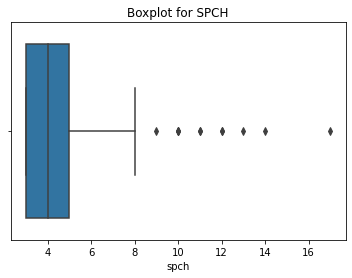

Outlier exists?  True


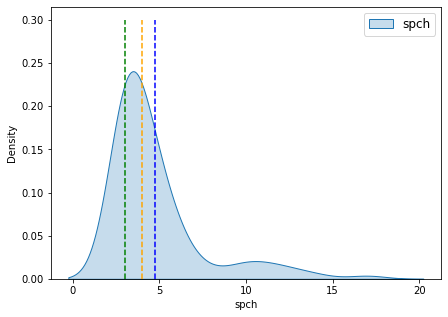

In [203]:
plt.title("Boxplot for SPCH")
sns.boxplot(x='spch', data=df_70s)
plt.show()

Q1 = np.percentile(spch_arr, 25, interpolation='midpoint')
Q3 = np.percentile(spch_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(spch_arr) > RUB or (np.min(spch_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=spch_arr, shade=True)
plt.legend(['spch'], fontsize=12)
plt.vlines(x=spch_arr.mean(), ymin=0, ymax=0.3, color='blue', linestyle='--')
plt.vlines(x=spch_arr.median(), ymin=0, ymax=0.3, color='orange', linestyle='--')
plt.vlines(x=scp.mode(spch_arr)[0][0], ymin=0, ymax=0.3, color='green', linestyle='--')
plt.show()

In [200]:
# Skewness
spch_arr.skew()

2.3044700644391143

From the KDE plot, it can be seen that the data is positively skewed whered the mode is less than the median and the median is less than the mean. The right shift of the mean value is due to the existence of outliers that exceeds the RUB. In addition, the skewness also implies that the data is more concentrated on the left. Based on the number line, it can be seen that songs in the 80s has relatively lower spch values. That is, the songs tend to contain fewer spoken words. However, the data needs to be compared with the findings in the other decades for better understanding.

#### POPULARITY

In [180]:
popularity_arr = df_70s['popularity']

In [181]:
# Compute additional information
Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

popularity_stats = [
    ['Mean', np.mean(popularity_arr)],
    ['Median', np.median(popularity_arr)],
    ['Mode', scp.mode(popularity_arr)[0][0]],
    ['Standard Deviation', np.std(popularity_arr)],
    ['Variance', np.var(popularity_arr)],
    ['Minimum', np.min(popularity_arr)],
    ['Maximum', np.max(popularity_arr)],
    ['Q1', Q1],
    ['Q3', Q3],
    ['IQR', IQR],
    ['RLB', Q1-1.5*IQR],  # Reasonable Lower Bound
    ['RUB', Q3+1.5*IQR],  # Reasonable Upper Bound
]

print('POPULARITY Description')
display(pd.DataFrame(popularity_stats, columns=['Measure', 'Value']))

POPULARITY Description


,Measure,Value
0,Mean,64.971154
1,Median,65.000000
2,Mode,56.000000
3,Standard Deviation,9.436485
4,Variance,89.047245
5,Minimum,40.000000
6,Maximum,84.000000
7,Q1,58.000000
8,Q3,73.500000
9,IQR,15.500000


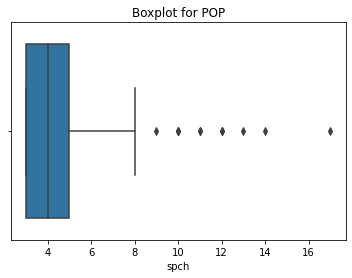

Outlier exists?  False


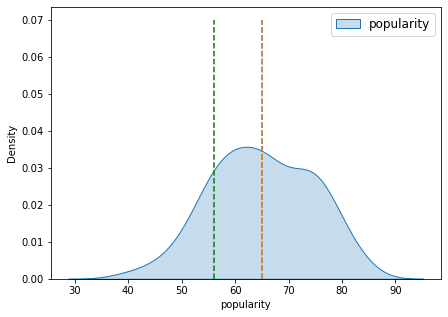

In [205]:
plt.title("Boxplot for POP")
sns.boxplot(x='spch', data=df_70s)
plt.show()

Q1 = np.percentile(popularity_arr, 25, interpolation='midpoint')
Q3 = np.percentile(popularity_arr, 75, interpolation='midpoint')
IQR = Q3-Q1  # Interquartile range

RLB = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
print("Outlier exists? ", np.max(popularity_arr) > RUB or (np.min(popularity_arr) < RLB))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(data=popularity_arr, shade=True)
plt.legend(['popularity'], fontsize=12)
plt.vlines(x=popularity_arr.mean(), ymin=0, ymax=0.07, color='blue', linestyle='--')
plt.vlines(x=popularity_arr.median(), ymin=0, ymax=0.07, color='orange', linestyle='--')
plt.vlines(x=scp.mode(popularity_arr)[0][0], ymin=0, ymax=0.07, color='green', linestyle='--')
plt.show()

In [206]:
# Skewness
popularity_arr.skew()

-0.12546390901513332

Based on the skewness calculation, the distribution is slightly negatively skewed. In fact, the mean is roughly equal to the median. 
Due to the low skewness value, the distribution is fairly symmetrical.

#### Has Winning Award

In [183]:
win_arr = df_70s['has_win_award']

In [184]:
win_arr.value_counts()

0.0    101
1.0      3
Name: has_win_award, dtype: int64

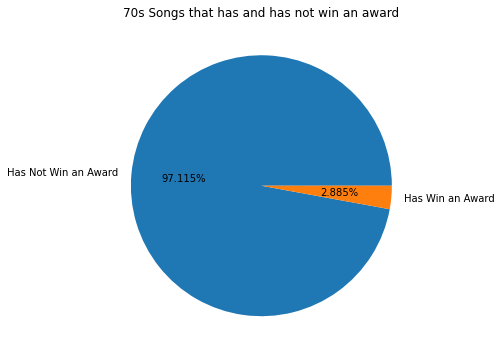

In [185]:
plt.figure(figsize=(6,6))
plt.title('70s Songs that has and has not win an award')
plt.pie(win_arr.value_counts(), labels=['Has Not Win an Award','Has Win an Award'], autopct='%1.3f%%')
plt.show()

Only 3 (2.885%) of the most popular songs from the 70s has win an award.

In [186]:
# Correlation map
df_70s.corr(method='pearson')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
year,1.000000,-0.041558,0.232814,0.172110,0.200561,0.039492,0.186671,-0.160471,-0.148508,-0.017678,-0.276680,-0.070872
bpm,-0.041558,1.000000,0.038774,-0.095560,-0.044142,-0.018616,0.044797,0.052125,-0.127571,0.129123,-0.072117,0.003404
nrgy,0.232814,0.038774,1.000000,0.366248,0.689531,0.121791,0.508909,0.030407,-0.624053,0.436489,-0.115439,-0.023698
dnce,0.172110,-0.095560,0.366248,1.000000,0.117634,-0.038819,0.680564,0.017006,-0.350125,0.087649,0.007383,-0.050318
dB,0.200561,-0.044142,0.689531,0.117634,1.000000,0.129274,0.136555,0.034079,-0.290991,0.335187,-0.069525,0.055469
live,0.039492,-0.018616,0.121791,-0.038819,0.129274,1.000000,0.027975,-0.041507,-0.120916,0.143605,0.026471,0.252113
val,0.186671,0.044797,0.508909,0.680564,0.136555,0.027975,1.000000,-0.157382,-0.458129,0.016982,-0.156941,-0.167505
dur,-0.160471,0.052125,0.030407,0.017006,0.034079,-0.041507,-0.157382,1.000000,-0.138132,-0.124008,0.224916,0.149523
acous,-0.148508,-0.127571,-0.624053,-0.350125,-0.290991,-0.120916,-0.458129,-0.138132,1.000000,-0.329176,-0.035391,-0.038603
spch,-0.017678,0.129123,0.436489,0.087649,0.335187,0.143605,0.016982,-0.124008,-0.329176,1.000000,0.094371,0.226744


Text(0.5, 1.0, 'Correlation matrix')

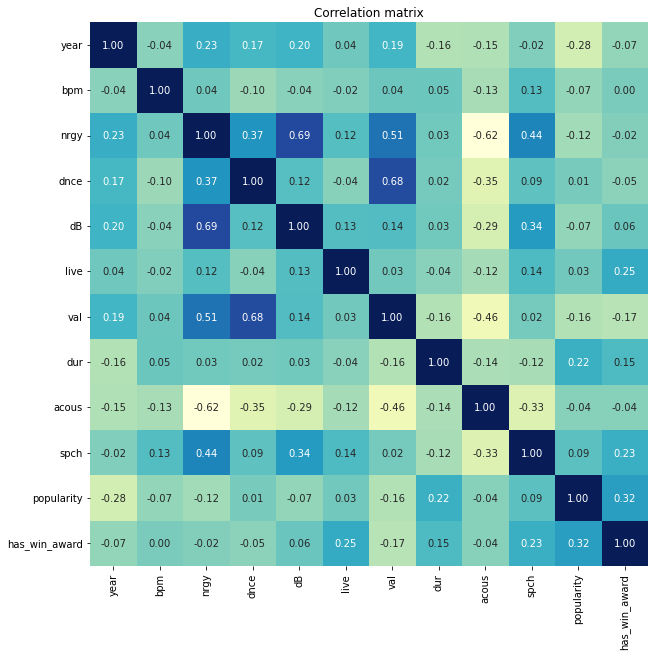

In [187]:
# Visualization heatmap correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(df_70s.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df_70s.select_dtypes(np.number).columns,
        yticklabels=df_70s.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

### Insights

<AxesSubplot:xlabel='dB', ylabel='nrgy'>

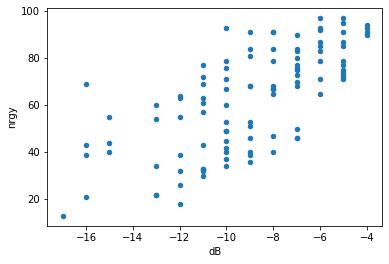

In [188]:
# dB and nrgy correlation
df_70s.plot.scatter(x='dB', y='nrgy', figsize=(6,4))

By the rule of thumb, there is a moderate positive correlation between nrgy and db. That is, the louder the song, the more energetic the song is.

<AxesSubplot:xlabel='dnce', ylabel='val'>

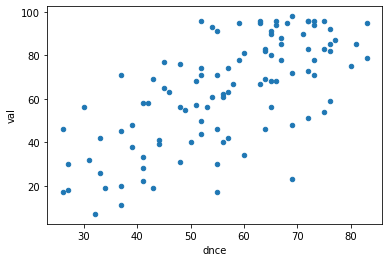

In [189]:
# dnce and val correlation
df_70s.plot.scatter(x='dnce', y='val', figsize=(6,4))

There is a moderate positive correlation between dnce and val. There is a weak trend: the more positive the mood of the song, the easier it is to dance to the song.

#### Artists

In [190]:
artist_arr = df_70s['artist']

In [191]:
artist_arr.value_counts()

Queen               8
Elton John          8
ABBA                7
Barbra Streisand    4
Diana Ross          3
                   ..
Curtis Mayfield     1
Donny Hathaway      1
AC/DC               1
The Spinners        1
T. Rex              1
Name: artist, Length: 71, dtype: int64

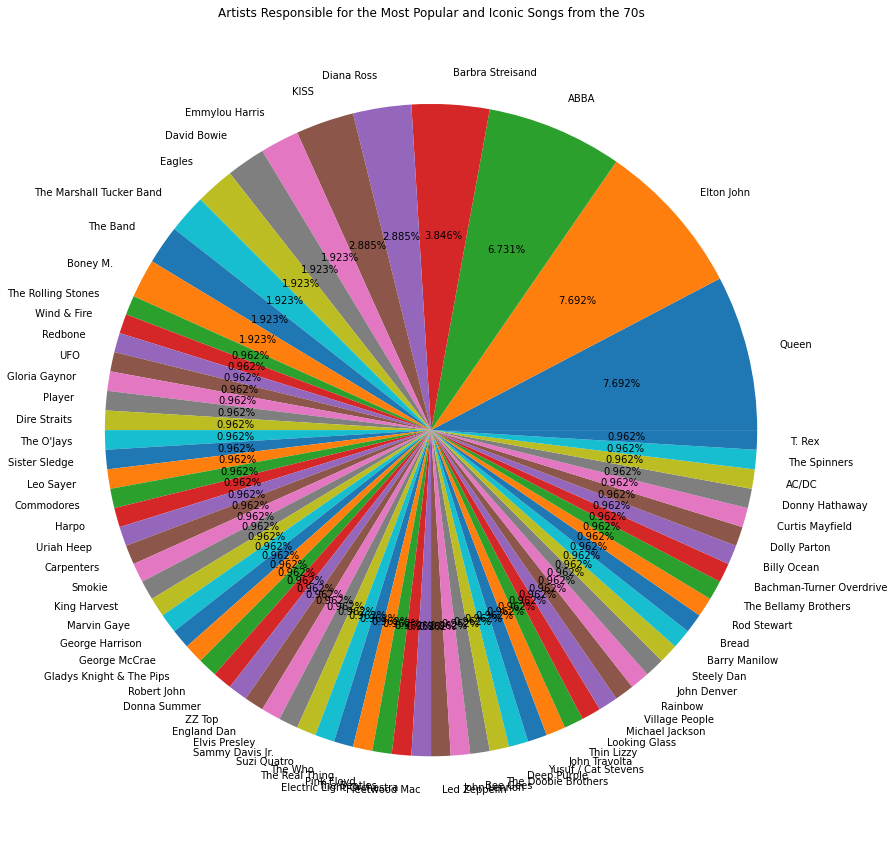

In [192]:
# Artists Responsible for the Most Popular and Iconic Songs from the 70s
plt.figure(figsize=(15,15))
plt.title('Artists Responsible for the Most Popular and Iconic Songs from the 70s')

plt.pie(artist_arr.value_counts(), labels=artist_arr.value_counts().index.tolist(), autopct='%1.3f%%')
plt.show()

Big names, such as Queen, Elton John, and ABBA accounts for more than 20% of the most popular songs in the 70s.